### Test the yahoo finance

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import set_style

## import model objects
from sklearn.model_selection import train_test_split
import yfinance as yf

from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv("../Data/dataset_others_class.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [4]:
df.dtypes

Date                  datetime64[ns, UTC]
CADUSD=X_Open                     float64
CADUSD=X_Close                    float64
CADUSD=X_High                     float64
CADUSD=X_Low                      float64
                             ...         
F_ROC                             float64
F_PVT                             float64
F_Bollinger_Upper                 float64
F_Bollinger_Lower                 float64
F_Close_pred_class                  int64
Length: 155, dtype: object

In [5]:
df.describe()

,CADUSD=X_Open,CADUSD=X_Close,CADUSD=X_High,CADUSD=X_Low,CADUSD=X_Volume,CADUSD=X_Change,CADUSD=X_Gain,CADUSD=X_Loss,CADUSD=X_Avg_Gain,CADUSD=X_Avg_Loss,...,F_RSI,F_k_percent,F_r_percent,F_MACD,F_MACD_EMA,F_ROC,F_PVT,F_Bollinger_Upper,F_Bollinger_Lower,F_Close_pred_class
count,1237.000000,1237.000000,1237.000000,1237.000000,1237.0,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,...,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1.237000e+03,1237.000000,1237.000000,1237.000000
mean,0.758633,0.758637,0.760732,0.756380,0.0,-0.000026,0.001221,0.001247,0.001222,0.001246,...,50.709762,49.819518,-50.180482,0.010772,0.010580,0.740316,9.941460e+07,13.119785,10.870765,0.489086
std,0.028260,0.028256,0.028313,0.028251,0.0,0.003274,0.001931,0.001986,0.000539,0.000647,...,17.235668,30.409753,30.409753,0.421543,0.395604,10.283284,6.203849e+07,3.942885,3.134942,0.500083
min,0.690026,0.689741,0.693371,0.681826,0.0,-0.012518,0.000000,0.000000,0.000048,0.000016,...,8.700013,0.000000,-100.000000,-1.071207,-0.953758,-40.504446,-8.287094e+07,5.333265,3.663582,0.000000
25%,0.736106,0.736106,0.738007,0.734338,0.0,-0.001900,0.000000,0.000000,0.000861,0.000809,...,39.339368,22.988487,-77.011513,-0.208349,-0.203198,-5.059206,6.629778e+07,11.077180,9.076939,0.000000
50%,0.752117,0.752049,0.753517,0.750047,0.0,-0.000024,0.000000,0.000024,0.001170,0.001165,...,50.068922,48.951025,-51.048975,0.005962,0.010275,0.195786,1.172903e+08,13.086324,11.188883,0.000000
75%,0.783644,0.783576,0.786046,0.780665,0.0,0.001853,0.001853,0.001900,0.001554,0.001513,...,63.233880,78.135583,-21.864417,0.241499,0.230694,6.650648,1.374546e+08,14.868315,12.244718,1.000000
max,0.830599,0.830703,0.832778,0.829009,0.0,0.012381,0.012381,0.012518,0.003353,0.004876,...,92.692054,100.000000,-0.000000,1.382432,1.213766,38.490564,2.332063e+08,26.710337,19.065638,1.000000


In [6]:
df.head()

,Date,CADUSD=X_Open,CADUSD=X_Close,CADUSD=X_High,CADUSD=X_Low,CADUSD=X_Volume,CADUSD=X_Change,CADUSD=X_Gain,CADUSD=X_Loss,CADUSD=X_Avg_Gain,...,F_RSI,F_k_percent,F_r_percent,F_MACD,F_MACD_EMA,F_ROC,F_PVT,F_Bollinger_Upper,F_Bollinger_Lower,F_Close_pred_class
0,2019-11-26 00:00:00+00:00,0.751665,0.751705,0.752842,0.750999,0.0,-0.000418,0.000000,0.000418,0.000289,...,62.087549,73.913071,-26.086929,0.006892,0.002249,-0.331855,2.394865e+06,9.188927,8.586074,1
1,2019-11-27 00:00:00+00:00,0.753597,0.753636,0.754205,0.752502,0.0,0.001932,0.001932,0.000000,0.000427,...,67.610216,89.583482,-10.416518,0.019164,0.005663,0.220269,2.768411e+06,9.183159,8.647842,0
2,2019-11-29 00:00:00+00:00,0.753125,0.753029,0.753211,0.751145,0.0,-0.000607,0.000000,0.000607,0.000427,...,62.910674,81.250149,-18.749851,0.025755,0.009711,0.221244,2.710846e+06,9.165730,8.712270,0
3,2019-12-02 00:00:00+00:00,0.752734,0.752791,0.753296,0.751569,0.0,-0.000238,0.000000,0.000238,0.000419,...,57.178300,70.833433,-29.166567,0.027163,0.013223,2.270145,2.505366e+06,9.172619,8.717381,0
4,2019-12-03 00:00:00+00:00,0.751552,0.751710,0.752899,0.750728,0.0,-0.001081,0.000000,0.001081,0.000419,...,45.657569,45.833433,-54.166567,0.019687,0.014522,1.137661,1.963927e+06,9.166840,8.712161,1


In [7]:
df = df.rename(columns={'F_Close_pred_class': 'F_prediction'})

In [8]:
df.columns

Index(['Date', 'CADUSD=X_Open', 'CADUSD=X_Close', 'CADUSD=X_High',
       'CADUSD=X_Low', 'CADUSD=X_Volume', 'CADUSD=X_Change', 'CADUSD=X_Gain',
       'CADUSD=X_Loss', 'CADUSD=X_Avg_Gain',
       ...
       'F_RSI', 'F_k_percent', 'F_r_percent', 'F_MACD', 'F_MACD_EMA', 'F_ROC',
       'F_PVT', 'F_Bollinger_Upper', 'F_Bollinger_Lower', 'F_prediction'],
      dtype='object', length=155)

In [9]:
## Remove open, close, high, low, vol columns
open_cols = [col for col in df.columns if '_Open' in col]
close_cols = [col for col in df.columns if '_Close' in col]
high_cols = [col for col in df.columns if '_High' in col]
low_cols = [col for col in df.columns if '_Low' in col]
vol_cols = [col for col in df.columns if '_Volume' in col]

df = df.drop(columns=open_cols)
df = df.drop(columns=close_cols)
df = df.drop(columns=high_cols)
df = df.drop(columns=low_cols)
df = df.drop(columns=vol_cols)

#df

In [12]:
df.head()

,Date,CADUSD=X_Change,CADUSD=X_Gain,CADUSD=X_Loss,CADUSD=X_Avg_Gain,CADUSD=X_Avg_Loss,CADUSD=X_SMA,CADUSD=X_EMA,CADUSD=X_change_in_price,CADUSD=X_RSI,...,F_change_in_price,F_RSI,F_k_percent,F_r_percent,F_MACD,F_MACD_EMA,F_ROC,F_PVT,F_Bollinger_Upper,F_prediction
0,2019-11-26 00:00:00+00:00,-0.000418,0.000000,0.000418,0.000289,0.000910,0.756581,0.756180,-0.000418,27.821853,...,0.01,62.087549,73.913071,-26.086929,0.006892,0.002249,-0.331855,2.394865e+06,9.188927,1
1,2019-11-27 00:00:00+00:00,0.001932,0.001932,0.000000,0.000427,0.000767,0.756063,0.755938,0.001932,42.880806,...,0.09,67.610216,89.583482,-10.416518,0.019164,0.005663,0.220269,2.768411e+06,9.183159,0
2,2019-11-29 00:00:00+00:00,-0.000607,0.000000,0.000607,0.000427,0.000641,0.755736,0.755661,-0.000607,39.864127,...,-0.04,62.910674,81.250149,-18.749851,0.025755,0.009711,0.221244,2.710846e+06,9.165730,0
3,2019-12-02 00:00:00+00:00,-0.000238,0.000000,0.000238,0.000419,0.000658,0.755404,0.755387,-0.000238,38.634678,...,-0.05,57.178300,70.833433,-29.166567,0.027163,0.013223,2.270145,2.505366e+06,9.172619,0
4,2019-12-03 00:00:00+00:00,-0.001081,0.000000,0.001081,0.000419,0.000707,0.754937,0.755037,-0.001081,33.260985,...,-0.12,45.657569,45.833433,-54.166567,0.019687,0.014522,1.137661,1.963927e+06,9.166840,1


In [13]:
correlation_matrix = df.corr()

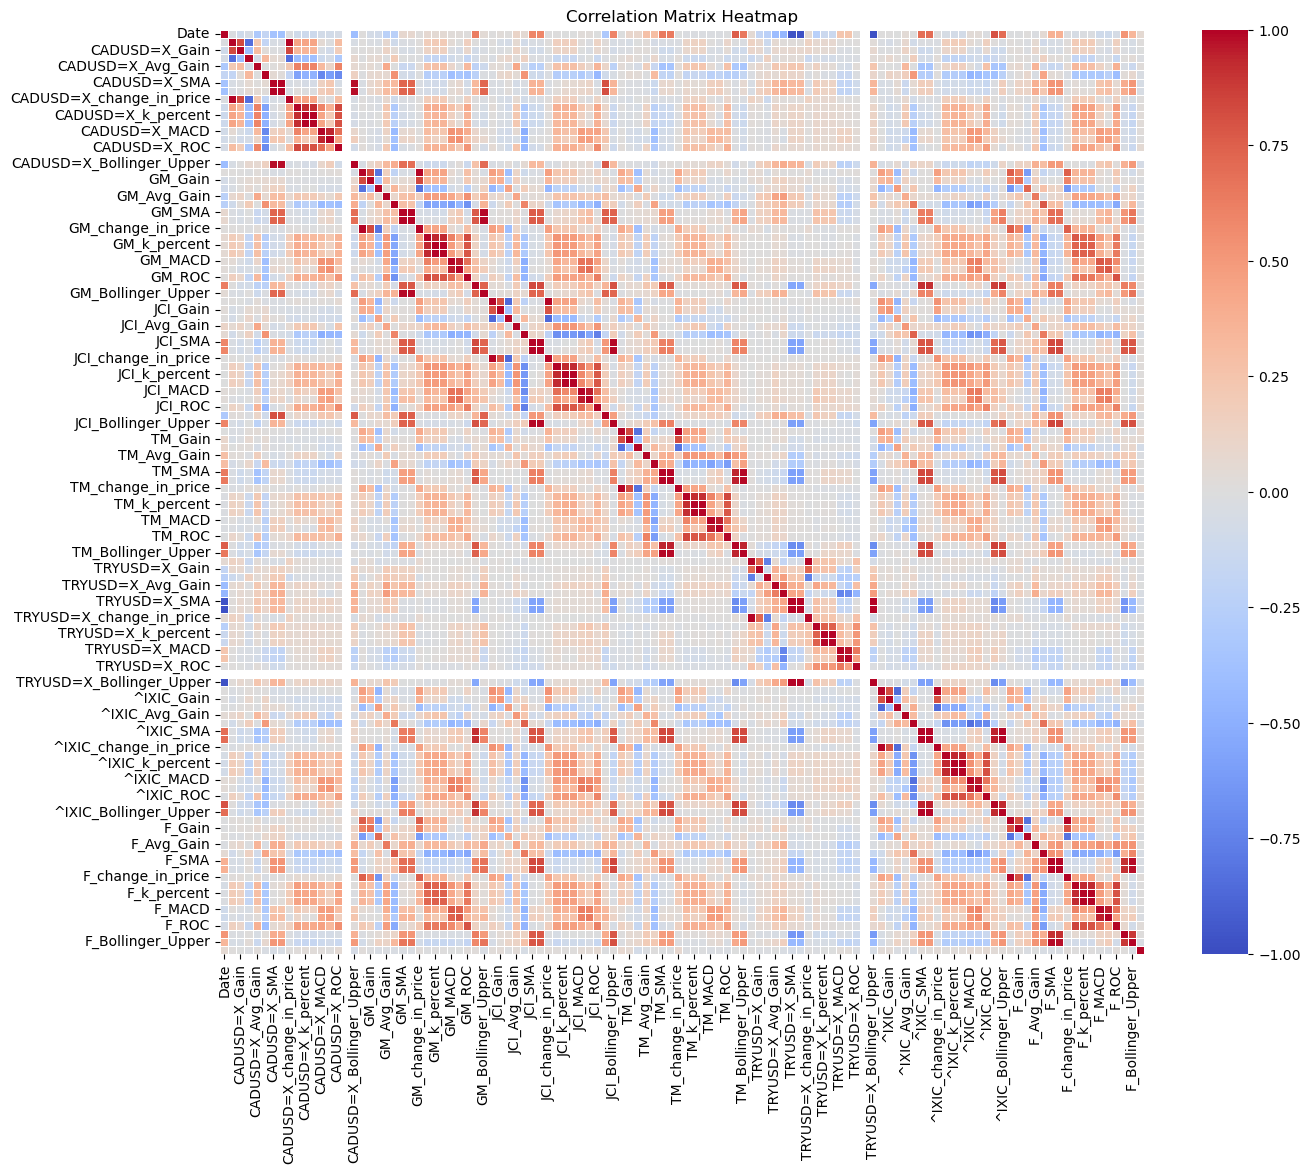

In [14]:
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1, center=0, square=True, linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [15]:
# Setting a threshold for multicollinearity (e.g., 0.9) to identify highly correlated features
threshold = 0.9

# Identifying highly correlated pairs
high_corr_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1]  # Remove self-correlation (1.0)

# Identify columns to drop to reduce multicollinearity
columns_to_drop = set()
for (feature1, feature2), corr_value in high_corr_pairs.items():
    if corr_value > threshold:
        # Only add feature2 to drop if feature1 has not already been marked for removal
        if feature1 not in columns_to_drop:
            columns_to_drop.add(feature2)

# Dropping the identified columns from the dataset
df_new = df.drop(columns=columns_to_drop)

## Train-Test model

In [16]:
features = df_new.columns.difference(['Date', 'F_prediction'])
target = 'F_prediction'

In [17]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV

In [18]:


# Step 2: Implement Time Series Split
# Define the Time Series Split with 4 splits as in the example
tscv = TimeSeriesSplit(n_splits=4)

# Store the indices of each training and test set for visualization and confirmation
time_series_splits = []
for train_index, test_index in tscv.split(df_new):
    time_series_splits.append((train_index, test_index))

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [20]:
# Initialize a list to store accuracy results for each split
accuracies = []

# Step 4: Train a single KNN model with default parameters on each split and evaluate accuracy
for i, (train_index, test_index) in enumerate(time_series_splits):
    

    # Split the data into train and test sets based on indices
    X_train, X_test = df_new.iloc[train_index][features], df_new.iloc[test_index][features]
    y_train, y_test = df_new.iloc[train_index][target], df_new.iloc[test_index][target]
    
    # Apply scaling on the training data and then apply the same scaler on the test data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Apply Power Transformation on the scaled data
    power_transformer = PowerTransformer()
    X_train_transformed = power_transformer.fit_transform(X_train_scaled)
    X_test_transformed = power_transformer.transform(X_test_scaled)
    
    # Initialize KNN model with default k=5
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_transformed, y_train)
    
    # Predict on test set and calculate accuracy
    y_pred = knn.predict(X_test_transformed)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

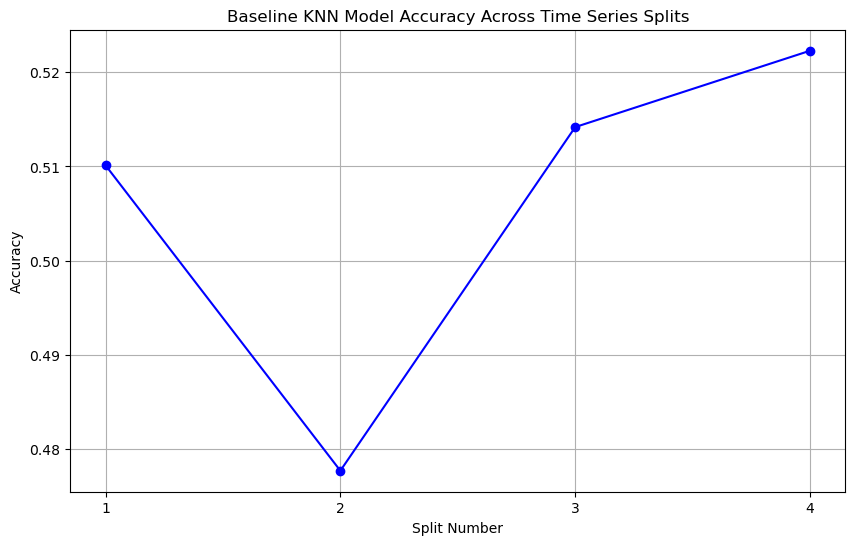

In [21]:
# Plot accuracy for each split
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-', color='b')
plt.title("Baseline KNN Model Accuracy Across Time Series Splits")
plt.xlabel("Split Number")
plt.ylabel("Accuracy")
plt.xticks(range(1, len(accuracies) + 1))
plt.grid(True)
plt.show()

In [22]:
k_values = range(3, 21,2)
k_accuracies_transformed_tuned = []  # Store average accuracy for each k

# Loop through each k-value and perform cross-validation with scaling and transformation inside each split
for k in k_values:
    split_accuracies = []
    
    # Train and evaluate KNN for each time series split
    for train_index, test_index in tscv.split(df_new):
        # Define training and testing sets
        X_train, X_test = df_new.iloc[train_index][features], df_new.iloc[test_index][features]
        y_train, y_test = df_new.iloc[train_index][target], df_new.iloc[test_index][target]
        
        # Apply scaling on the training data and then apply the same scaler on the test data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Apply Power Transformation on the scaled data
        power_transformer = PowerTransformer()
        X_train_transformed = power_transformer.fit_transform(X_train_scaled)
        X_test_transformed = power_transformer.transform(X_test_scaled)
        
        # Initialize KNN with current k-value
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_transformed, y_train)
        
        # Predict and evaluate accuracy on test set
        y_pred = knn.predict(X_test_transformed)
        accuracy = accuracy_score(y_test, y_pred)
        split_accuracies.append(accuracy)
    
    # Calculate and store the average accuracy for this k-value
    k_accuracies_transformed_tuned.append(sum(split_accuracies) / len(split_accuracies))

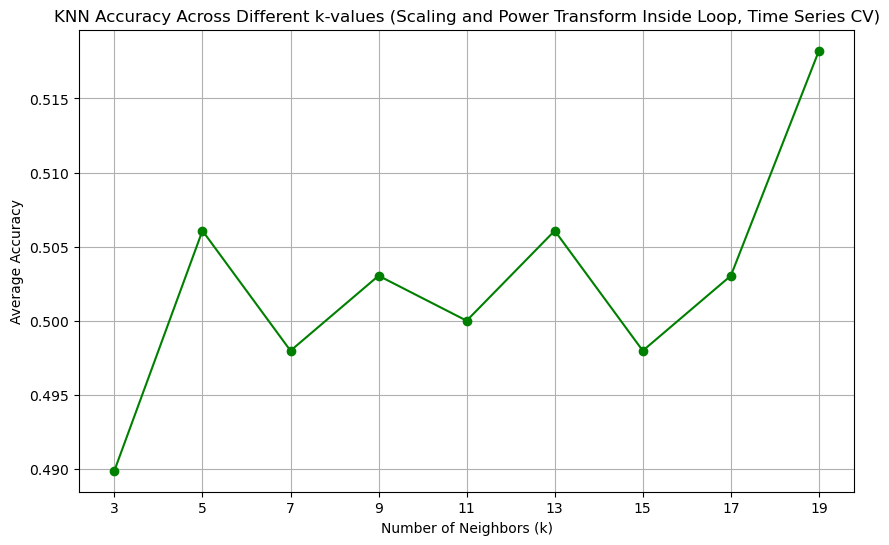

In [23]:
# Plot the accuracy for each k-value on transformed data with scaling inside the loop
plt.figure(figsize=(10, 6))
plt.plot(k_values, k_accuracies_transformed_tuned, marker='o', linestyle='-', color='g')
plt.title("KNN Accuracy Across Different k-values (Scaling and Power Transform Inside Loop, Time Series CV)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Average Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [24]:
# Expanded parameter grid for GridSearch with k, distance metric, and weighting scheme
param_grid_expanded = {
    'n_neighbors': list(range(3, 21,2)),  # Testing k from 1 to 20
    'metric': ['euclidean', 'manhattan'],  # Different distance metrics
    'weights': ['uniform', 'distance']     # Different weighting schemes
}


In [25]:

# Initialize a dictionary to store accuracy for each parameter combination
grid_scores = {}

# Custom grid search implementation with expanded parameters
for k in param_grid_expanded['n_neighbors']:
    for metric in param_grid_expanded['metric']:
        for weight in param_grid_expanded['weights']:
            key = (k, metric, weight)
            grid_scores[key] = []
            
            # Perform time series split and evaluate each parameter set
            for train_index, test_index in tscv.split(df_new):
                X_train, X_test = df_new.iloc[train_index][features], df_new.iloc[test_index][features]
                y_train, y_test = df_new.iloc[train_index][target], df_new.iloc[test_index][target]
                
                # Scale and transform
                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)
                
                power_transformer = PowerTransformer()
                X_train_transformed = power_transformer.fit_transform(X_train_scaled)
                X_test_transformed = power_transformer.transform(X_test_scaled)

                # KNN model with current parameter set
                knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights=weight)
                knn.fit(X_train_transformed, y_train)

                # Accuracy calculation
                accuracy = accuracy_score(y_test, knn.predict(X_test_transformed))
                grid_scores[key].append(accuracy)

# Calculate average accuracy for each parameter combination
avg_expanded_scores = {key: sum(scores) / len(scores) for key, scores in grid_scores.items()}
best_params_expanded = max(avg_expanded_scores, key=avg_expanded_scores.get)



In [26]:
best_params_expanded

(15, 'manhattan', 'uniform')

In [27]:
knn_best = KNeighborsClassifier(
    n_neighbors=best_params_expanded[0],
    metric=best_params_expanded[1],
    weights=best_params_expanded[2]
)

In [28]:
accuracies = []

# Step 4: Train a single KNN model with default parameters on each split and evaluate accuracy
for i, (train_index, test_index) in enumerate(time_series_splits):
    

    # Split the data into train and test sets based on indices
    X_train, X_test = df_new.iloc[train_index][features], df_new.iloc[test_index][features]
    y_train, y_test = df_new.iloc[train_index][target], df_new.iloc[test_index][target]
    
    # Apply scaling on the training data and then apply the same scaler on the test data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Apply Power Transformation on the scaled data
    power_transformer = PowerTransformer()
    X_train_transformed = power_transformer.fit_transform(X_train_scaled)
    X_test_transformed = power_transformer.transform(X_test_scaled)

    knn_best.fit(X_train_transformed, y_train)
    
    # Predict on test set and calculate accuracy
    y_pred = knn_best.predict(X_test_transformed)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

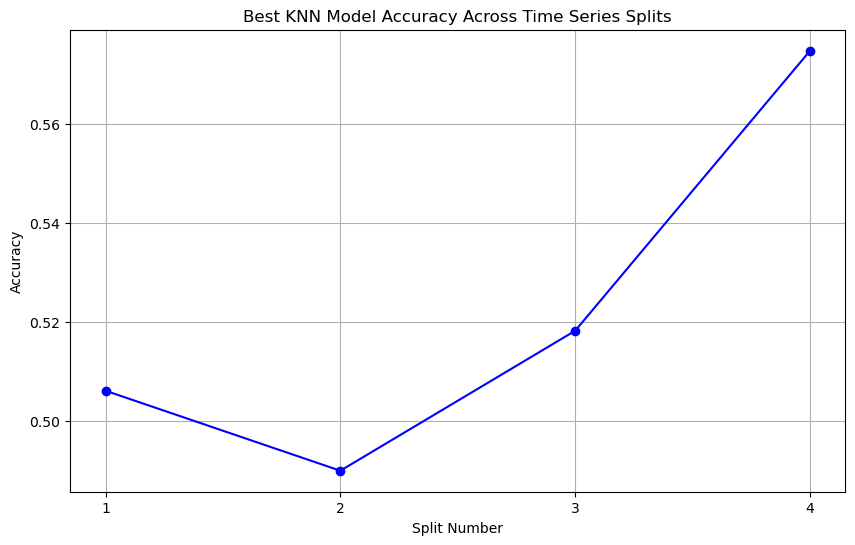

In [29]:
# Plot accuracy for each split
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-', color='b')
plt.title("Best KNN Model Accuracy Across Time Series Splits")
plt.xlabel("Split Number")
plt.ylabel("Accuracy")
plt.xticks(range(1, len(accuracies) + 1))
plt.grid(True)
plt.show()

In [48]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

In [51]:
def fastdtw_distance_matrix(X_train, X_test):
    train_size = len(X_train)
    test_size = len(X_test)
    distance_matrix = np.zeros((test_size, train_size))
    
    for i in range(test_size):
        for j in range(train_size):
            # Flatten each row to 1D for DTW distance calculation
            distance, _ = fastdtw(X_test[i].flatten(), X_train[j].flatten(), dist=euclidean)
            distance_matrix[i, j] = distance
    return distance_matrix


In [37]:
# Implementing KNN with custom DTW after scaling and power transforming the data

# Re-define the custom DTW function
def custom_dtw(x, y):
    n, m = len(x), len(y)
    dtw_matrix = np.zeros((n + 1, m + 1))
    dtw_matrix[1:, 0] = np.inf
    dtw_matrix[0, 1:] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(x[i - 1] - y[j - 1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i - 1, j], dtw_matrix[i, j - 1], dtw_matrix[i - 1, j - 1])
    return dtw_matrix[n, m]

# Initialize the KNN classifier with the custom DTW distance
knn_dtw = KNeighborsClassifier(n_neighbors=5, metric=custom_dtw)



In [36]:
# TimeSeriesSplit cross-validation for KNN with custom DTW
tscv = TimeSeriesSplit(n_splits=5)
accuracies_dtw = []

# Cross-validation process
for i, (train_index, test_index) in enumerate(time_series_splits):
    # Split the data into train and test sets based on indices
    X_train, X_test = df_new.iloc[train_index][features], df_new.iloc[test_index][features]
    y_train, y_test = df_new.iloc[train_index][target], df_new.iloc[test_index][target]
    
    # Apply scaling on the training data and then apply the same scaler on the test data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Apply Power Transformation on the scaled data
    power_transformer = PowerTransformer()
    X_train_transformed = power_transformer.fit_transform(X_train_scaled)
    X_test_transformed = power_transformer.transform(X_test_scaled)

    knn_dtw.fit(X_train, y_train)
    y_pred = knn_dtw.predict(X_test)
    accuracies_dtw.append(accuracy_score(y_test, y_pred))

# Average accuracy for KNN with DTW
average_accuracy_dtw_knn = np.mean(accuracies_dtw)
average_accuracy_dtw_knn


KeyboardInterrupt: 

In [39]:
# Define a function to create time series splits using TimeSeriesSplit
def create_time_series_splits(X, n_splits=4):

    # Initialize TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=n_splits)
    
    # Store indices of each split
    time_series_splits = [(train_index, test_index) for train_index, test_index in tscv.split(X)]
    
    return time_series_splits

In [44]:
# Initialize a list to store accuracy results for each split
accuracies = []
df_last_60 = df.iloc[-60:]

time_series_splits = create_time_series_splits(df_last_60)
# Step 4: Train a single KNN model with default parameters on each split and evaluate accuracy
for i, (train_index, test_index) in enumerate(time_series_splits):
    

    # Split the data into train and test sets based on indices
    X_train, X_test = df_last_60.iloc[train_index][features], df_last_60.iloc[test_index][features]
    y_train, y_test = df_last_60.iloc[train_index][target], df_last_60.iloc[test_index][target]
    
    # Apply scaling on the training data and then apply the same scaler on the test data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Apply Power Transformation on the scaled data
    power_transformer = PowerTransformer()
    X_train_transformed = power_transformer.fit_transform(X_train_scaled)
    X_test_transformed = power_transformer.transform(X_test_scaled)
    
    # Initialize KNN model with default k=5
    knn_dtw = KNeighborsClassifier(n_neighbors=5, metric=custom_dtw)
    knn_dtw.fit(X_train_transformed, y_train)
    
    # Predict on test set and calculate accuracy
    y_pred = knn_dtw.predict(X_test_transformed)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

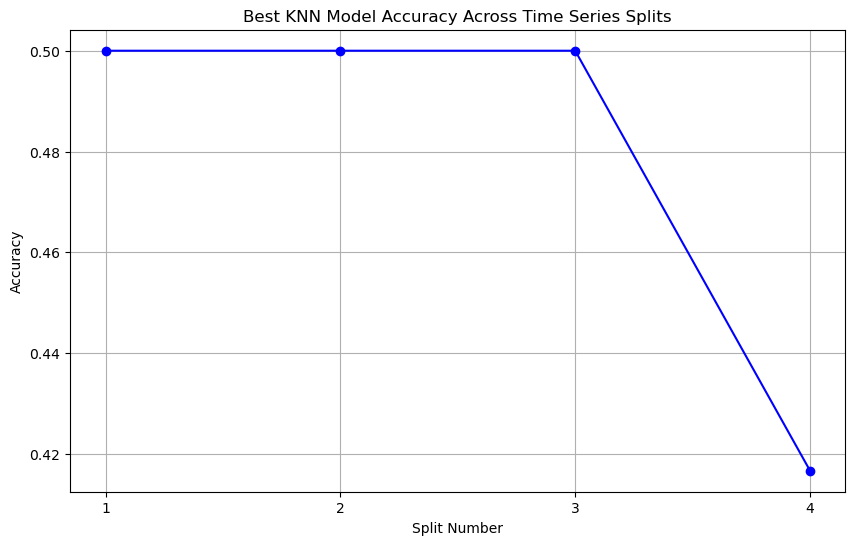

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-', color='b')
plt.title("Best KNN Model Accuracy Across Time Series Splits")
plt.xlabel("Split Number")
plt.ylabel("Accuracy")
plt.xticks(range(1, len(accuracies) + 1))
plt.grid(True)
plt.show()

In [43]:
k_values = range(3, 21, 2)
k_accuracies_tuned = []  # Store average accuracy for each k during tuning

for k in k_values:
    split_accuracies = []
    
    for train_index, test_index in time_series_splits:
        # Define training and testing sets
        X_train, X_test = df_last_60.iloc[train_index][features], df_last_60.iloc[test_index][features]
        y_train, y_test = df_last_60.iloc[train_index][target], df_last_60.iloc[test_index][target]
        
        # Apply scaling and power transformation
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        X_train_transformed = power_transformer.fit_transform(X_train_scaled)
        X_test_transformed = power_transformer.transform(X_test_scaled)
        
        # Initialize KNN with current k-value
        knn = KNeighborsClassifier(n_neighbors=k, metric=custom_dtw)
        knn.fit(X_train_transformed, y_train)
        
        # Predict and evaluate accuracy on test set
        y_pred = knn.predict(X_test_transformed)
        accuracy = accuracy_score(y_test, y_pred)
        split_accuracies.append(accuracy)
    
    # Calculate and store the average accuracy for this k-value
    k_accuracies_tuned.append(sum(split_accuracies) / len(split_accuracies))



ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 13, n_samples_fit = 12, n_samples = 12

In [ ]:
plt.plot(k_values, k_accuracies_tuned, marker='x', linestyle='-', color='red', label='Tuned k values')

plt.xlabel('Split Number / k Value')
plt.ylabel('Accuracy')
plt.title('KNN with DTW - Baseline (k=3) vs. Tuned k values')
plt.legend()
plt.show()